# RFM Analysis - full analysis

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

## Quick Overview

In [2]:
#Load the dataset

df1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [3]:
#Merge the two datasets
df = pd.concat([df1, df2], ignore_index=True)

In [4]:
#Add "Amount" column
df['Amount'] = df['Quantity'] * df['Price']

In [5]:
#Check the number of rows and columns in the dataset
df.shape

(1067371, 9)

In [6]:
#See the first 10 rows
df.head(10)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  Amount  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.0  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom    39.6  
6 2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.0  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom    59.5  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom    30.6  
9 2009-12-01 07:46:00   3.75      13085.0  United Kingdom    45.0

In [7]:
#Rename columns
df.rename(columns={
    'StockCode': 'Stock Code',
    'InvoiceDate': 'Invoice Date',
    'Price': 'Unit Price'
}, inplace=True)

In [8]:
#Show dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Invoice       1067371 non-null  object        
 1   Stock Code    1067371 non-null  object        
 2   Description   1062989 non-null  object        
 3   Quantity      1067371 non-null  int64         
 4   Invoice Date  1067371 non-null  datetime64[ns]
 5   Unit Price    1067371 non-null  float64       
 6   Customer ID   824364 non-null   float64       
 7   Country       1067371 non-null  object        
 8   Amount        1067371 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 73.3+ MB


In [9]:
#Summary statistics
df.describe()

Quantity                   Invoice Date    Unit Price  \
count  1.067371e+06                        1067371  1.067371e+06   
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00   
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04   
25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00   
50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00   
75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00   
max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04   
std    1.727058e+02                            NaN  1.235531e+02   

         Customer ID        Amount  
count  824364.000000  1.067371e+06  
mean    15324.638504  1.806987e+01  
min     12346.000000 -1.684696e+05  
25%     13975.000000  3.750000e+00  
50%     15255.000000  9.900000e+00  
75%     16797.000000  1.770000e+01  
max     18287.000000  1.684696e+05  
std      1697.464450  2.924202e+02

## Data Cleaning

### Handling Missing Values

In [10]:
#Check for missing values
df.isna().sum()

Invoice              0
Stock Code           0
Description       4382
Quantity             0
Invoice Date         0
Unit Price           0
Customer ID     243007
Country              0
Amount               0
dtype: int64

#### Handling Missing Values in "Description" column

In [11]:
#Make product descriptions uppercase
df['Description'] = df['Description'].str.upper()

In [12]:
#Check the number of unique values
df['Description'].nunique()

5671

In [13]:
#Show rows with missing values
df[df['Description'].isnull()]

Invoice Stock Code Description  Quantity        Invoice Date  \
470      489521      21646         NaN       -50 2009-12-01 11:44:00   
3114     489655      20683         NaN       -44 2009-12-01 17:26:00   
3161     489659      21350         NaN       230 2009-12-01 17:39:00   
3731     489781      84292         NaN        17 2009-12-02 11:45:00   
4296     489806      18010         NaN      -770 2009-12-02 12:42:00   
...         ...        ...         ...       ...                 ...   
1060783  581199      84581         NaN        -2 2011-12-07 18:26:00   
1060787  581203      23406         NaN        15 2011-12-07 18:31:00   
1060793  581209      21620         NaN         6 2011-12-07 18:35:00   
1062442  581234      72817         NaN        27 2011-12-08 10:33:00   
1064015  581408      85175         NaN        20 2011-12-08 14:06:00   

         Unit Price  Customer ID         Country  Amount  
470             0.0          NaN  United Kingdom    -0.0  
3114            0.0          NaN  United Kingdom    -0.0  
3161            0.0          NaN  United Kingdom     0.0  
3731            0.0          NaN  United Kingdom     0.0  
4296            0.0          NaN  United Kingdom    -0.0  
...             ...          ...             ...     ...  
1060783         0.0          NaN  United Kingdom    -0.0  
1060787         0.0          NaN  United Kingdom     0.0  
1060793         0.0          NaN  United Kingdom     0.0  
1062442         0.0          NaN  United Kingdom     0.0  
1064015         0.0          NaN  United Kingdom     0.0  

[4386 rows x 9 columns]

In [14]:
#Drop rows with null values
df = df.dropna(subset=['Description'])

In [15]:
#Check the number of descriptions after cleaning
len(df['Description'])

1062985

#### Handling Missing Values in "Customer ID" column

In [16]:
#Show rows with missing values
df[df['Customer ID'].isnull()]

Invoice Stock Code                     Description  Quantity  \
263      489464      21733                    85123A MIXED       -96   
283      489463      71477                           SHORT      -240   
284      489467     85123A                     21733 MIXED      -192   
577      489525     85226C       BLUE PULL BACK RACING CAR         1   
578      489525      85227     SET/6 3D KIT CARDS FOR KIDS         1   
...         ...        ...                             ...       ...   
1066997  581498     85099B         JUMBO BAG RED RETROSPOT         5   
1066998  581498     85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
1066999  581498      85150   LADIES & GENTLEMEN METAL SIGN         1   
1067000  581498      85174               S/4 CACTI CANDLES         1   
1067001  581498        DOT                  DOTCOM POSTAGE         1   

               Invoice Date  Unit Price  Customer ID         Country   Amount  
263     2009-12-01 10:52:00        0.00          NaN  United Kingdom    -0.00  
283     2009-12-01 10:52:00        0.00          NaN  United Kingdom    -0.00  
284     2009-12-01 10:53:00        0.00          NaN  United Kingdom    -0.00  
577     2009-12-01 11:49:00        0.55          NaN  United Kingdom     0.55  
578     2009-12-01 11:49:00        0.85          NaN  United Kingdom     0.85  
...                     ...         ...          ...             ...      ...  
1066997 2011-12-09 10:26:00        4.13          NaN  United Kingdom    20.65  
1066998 2011-12-09 10:26:00        4.13          NaN  United Kingdom    16.52  
1066999 2011-12-09 10:26:00        4.96          NaN  United Kingdom     4.96  
1067000 2011-12-09 10:26:00       10.79          NaN  United Kingdom    10.79  
1067001 2011-12-09 10:26:00     1714.17          NaN  United Kingdom  1714.17  

[238621 rows x 9 columns]

In [17]:
#Get the total count of null values
df['Customer ID'].isnull().sum()

238621

In [18]:
#Drop rows with null values
df = df.dropna(subset=['Customer ID'])

### Handling Duplicates Data

In [19]:
#Check for duplicate rows
df.duplicated().sum()

26479

In [20]:
#Drop duplicates
df = df.drop_duplicates()

### Check and Handling Column One by One

#### "Invoice" Column

In [21]:
#Change the data type to string
df['Invoice'] = df['Invoice'].astype(str)

In [22]:
#Checking for orders starting with "C" indicating cancellations
df[df['Invoice'].str.startswith('C')]

Invoice Stock Code                       Description  Quantity  \
178      C489449      22087          PAPER BUNTING WHITE LACE       -12   
179      C489449     85206A      CREAM FELT EASTER EGG BASKET        -6   
180      C489449      21895     POTTING SHED SOW 'N' GROW SET        -4   
181      C489449      21896                POTTING SHED TWINE        -6   
182      C489449      22083        PAPER CHAIN KIT RETRO SPOT       -12   
...          ...        ...                               ...       ...   
1065910  C581490      23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
1067002  C581499          M                            MANUAL        -1   
1067176  C581568      21258        VICTORIAN SEWING BOX LARGE        -5   
1067177  C581569      84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
1067178  C581569      20979     36 PENCILS TUBE RED RETROSPOT        -5   

               Invoice Date  Unit Price  Customer ID         Country  Amount  
178     2009-12-01 10:33:00        2.95      16321.0       Australia  -35.40  
179     2009-12-01 10:33:00        1.65      16321.0       Australia   -9.90  
180     2009-12-01 10:33:00        4.25      16321.0       Australia  -17.00  
181     2009-12-01 10:33:00        2.10      16321.0       Australia  -12.60  
182     2009-12-01 10:33:00        2.95      16321.0       Australia  -35.40  
...                     ...         ...          ...             ...     ...  
1065910 2011-12-09 09:57:00        0.83      14397.0  United Kingdom   -9.13  
1067002 2011-12-09 10:28:00      224.69      15498.0  United Kingdom -224.69  
1067176 2011-12-09 11:57:00       10.95      15311.0  United Kingdom  -54.75  
1067177 2011-12-09 11:58:00        1.25      17315.0  United Kingdom   -1.25  
1067178 2011-12-09 11:58:00        1.25      17315.0  United Kingdom   -6.25  

[18390 rows x 9 columns]

In [23]:
#Drop cancelled orders
df = df[~df['Invoice'].astype(str).str.startswith('C')]

#### "Stock Code" Column

In [24]:
#Change data type to string
df['Stock Code'] = df['Stock Code'].astype(str)

#### "Description" Column

In [25]:
#Check for incorrect values
unwanted = ["ADJUSTMENT", "BROKEN", "WET", "CRUSHED", "DAMAGED", "DAMAGES", "DAMP", "DIRTY", "DONATED", "INCORRECT", 
            "LOST", "GONE", "MISSING", "MOULDY", "SMASHED", "WRONG", "ERROR", "WRONGLY", "OOPS", "CARGO", "COUNTED", 
            "DISCOLOURED", "DISCOUNT", "EBAY", "FAULTY", "FOUND", "GIVEN", "MANUAL", "NO STOCK", 
            "NON COLOUR", "REVERSE", "REX USE", "RUSTY", "SHORT", "UPDATE", "BROKEN WONKY", 
            "SAMPLES", "TAIG", "THROUGH", "UNSALEABLE", "WEBSITE", "FIND", "MARKED", "NEXT"]

df[df["Description"].str.upper().str.contains("|".join(unwanted))]["Description"].unique()

array(['MANUAL', 'ADJUSTMENT BY JOHN ON 26/01/2010 16',
       'ADJUSTMENT BY JOHN ON 26/01/2010 17', 'DISCOUNT',
       'ADJUSTMENT BY PETER ON JUN 25 2010 ', 'NEXT DAY CARRIAGE'],
      dtype=object)

In [26]:
#Drop descriptions containing unwanted keywords
df = df[~df['Description'].str.upper().str.contains("|".join(unwanted), na=False)]

#### "Quantity" Column

In [27]:
#Check how many negative quantities exist
(df['Quantity'] < 0).sum()

0

#### "Unit Price" Column

In [28]:
#Check how many negative unit prices exist
(df['Unit Price'] < 0).sum()

0

In [29]:
#Show zero-priced items
df[df['Unit Price'] == 0]

Invoice Stock Code                     Description  Quantity  \
4674     489825      22076              6 RIBBONS EMPIRE          12   
6781     489998      48185             DOOR MAT FAIRY CAKE         2   
18738    490961      22065  CHRISTMAS PUDDING TRINKET POT          1   
18739    490961      22142    CHRISTMAS CRAFT WHITE FAIRY         12   
32916    492079      85042       ANTIQUE LILY FAIRY LIGHTS         8   
...         ...        ...                             ...       ...   
979924   575579      22437   SET OF 9 BLACK SKULL BALLOONS        20   
979925   575579      22089   PAPER BUNTING VINTAGE PAISLEY        24   
1004540  577129      22464     HANGING METAL HEART LANTERN         4   
1006110  577314      23407  SET OF 2 TRAYS HOME SWEET HOME         2   
1027583  578841      84826  ASSTD DESIGN 3D PAPER STICKERS     12540   

               Invoice Date  Unit Price  Customer ID         Country  Amount  
4674    2009-12-02 13:34:00         0.0      16126.0  United Kingdom     0.0  
6781    2009-12-03 11:19:00         0.0      15658.0  United Kingdom     0.0  
18738   2009-12-08 15:25:00         0.0      14108.0  United Kingdom     0.0  
18739   2009-12-08 15:25:00         0.0      14108.0  United Kingdom     0.0  
32916   2009-12-15 13:49:00         0.0      15070.0  United Kingdom     0.0  
...                     ...         ...          ...             ...     ...  
979924  2011-11-10 11:49:00         0.0      13081.0  United Kingdom     0.0  
979925  2011-11-10 11:49:00         0.0      13081.0  United Kingdom     0.0  
1004540 2011-11-17 19:52:00         0.0      15602.0  United Kingdom     0.0  
1006110 2011-11-18 13:23:00         0.0      12444.0          Norway     0.0  
1027583 2011-11-25 15:57:00         0.0      13256.0  United Kingdom     0.0  

[63 rows x 9 columns]

In [30]:
#Keep only rows with positive unit prices
df = df[df['Unit Price'] > 0]

#### "Customer ID" Column

In [31]:
#Change data type to string
df['Customer ID'] = df['Customer ID'].astype(str)

In [32]:
#Replace the decimal
df['Customer ID'] = df['Customer ID'].str.replace('\.0$', '', regex=True)

#### "Country" Column

In [33]:
#Change the data type to string
df['Country'] = df['Country'].astype(str)

In [34]:
#Show unique values 
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Malta', 'RSA', 'Singapore',
       'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'Nigeria',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [35]:
#Show rows where "Country" is unspecified
df[df['Country'] == 'Unspecified']

Invoice Stock Code                        Description  Quantity  \
61394   494860      84832   ZINC WILLIE WINKIE  CANDLE STICK         5   
61395   494860      84836        ZINC METAL HEART DECORATION         5   
61396   494860     85014D   PINK/BROWN DOTS RUFFLED UMBRELLA         1   
61397   494860     85014A   BLACK/BLUE DOTS RUFFLED UMBRELLA         1   
61398   494860     85014B    RED/WHITE DOTS RUFFLED UMBRELLA         2   
...        ...        ...                                ...       ...   
834271  564051      23007             SPACEBOY BABY GIFT SET         1   
834272  564051      21833               CAMOUFLAGE LED TORCH        12   
834273  564051      23081      GREEN METAL BOX ARMY SUPPLIES         2   
834274  564051      23046  PAPER LANTERN 9 POINT DELUXE STAR         2   
834275  564051      23045   PAPER LANTERN 5 POINT STAR MOON          4   

              Invoice Date  Unit Price Customer ID      Country  Amount  
61394  2010-01-19 11:01:00        0.85       12470  Unspecified    4.25  
61395  2010-01-19 11:01:00        1.25       12470  Unspecified    6.25  
61396  2010-01-19 11:01:00        5.95       12470  Unspecified    5.95  
61397  2010-01-19 11:01:00        5.95       12470  Unspecified    5.95  
61398  2010-01-19 11:01:00        5.95       12470  Unspecified   11.90  
...                    ...         ...         ...          ...     ...  
834271 2011-08-22 13:32:00       16.95       14265  Unspecified   16.95  
834272 2011-08-22 13:32:00        1.69       14265  Unspecified   20.28  
834273 2011-08-22 13:32:00        8.25       14265  Unspecified   16.50  
834274 2011-08-22 13:32:00        6.65       14265  Unspecified   13.30  
834275 2011-08-22 13:32:00        4.15       14265  Unspecified   16.60  

[518 rows x 9 columns]

In [36]:
#Number of 'Unspecified' countries
(df['Country'] == 'Unspecified').sum()

518

In [37]:
#Filter out 'Unspecified' countries
df = df[df['Country'] != 'Unspecified']

### Check the Cleaned Data

In [38]:
df.head()

Invoice Stock Code                          Description  Quantity  \
0  489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434     79323P                   PINK CHERRY LIGHTS        12   
2  489434     79323W                  WHITE CHERRY LIGHTS        12   
3  489434      22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24   

         Invoice Date  Unit Price Customer ID         Country  Amount  
0 2009-12-01 07:45:00        6.95       13085  United Kingdom    83.4  
1 2009-12-01 07:45:00        6.75       13085  United Kingdom    81.0  
2 2009-12-01 07:45:00        6.75       13085  United Kingdom    81.0  
3 2009-12-01 07:45:00        2.10       13085  United Kingdom   100.8  
4 2009-12-01 07:45:00        1.25       13085  United Kingdom    30.0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778107 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       778107 non-null  object        
 1   Stock Code    778107 non-null  object        
 2   Description   778107 non-null  object        
 3   Quantity      778107 non-null  int64         
 4   Invoice Date  778107 non-null  datetime64[ns]
 5   Unit Price    778107 non-null  float64       
 6   Customer ID   778107 non-null  object        
 7   Country       778107 non-null  object        
 8   Amount        778107 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 59.4+ MB


In [40]:
df.describe()

Quantity                   Invoice Date     Unit Price  \
count  778107.000000                         778107  778107.000000   
mean       13.493189  2011-01-03 02:36:50.296449792       3.026507   
min         1.000000            2009-12-01 07:45:00       0.001000   
25%         2.000000            2010-07-02 14:39:00       1.250000   
50%         6.000000            2010-12-02 14:40:00       1.950000   
75%        12.000000            2011-08-01 16:41:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       145.953793                            NaN      11.231755   

              Amount  
count  778107.000000  
mean       22.115920  
min         0.001000  
25%         4.950000  
50%        12.480000  
75%        19.800000  
max    168469.600000  
std       225.963973

In [41]:
#Export cleaned data to excel
#df.to_excel("Data Cleaned (RFM).xlsx", index=False)

## RFM Analysis

In [42]:
#Snapshot date: a day after last transaction
snapshot_date = df['Invoice Date'].max() + pd.Timedelta(days=1)

In [43]:
#Calculate RFM metrics
rfm = df.groupby('Customer ID').agg({
    'Invoice Date': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'Amount': 'sum'
})

#Rename columns
rfm.rename(columns={
    'Invoice Date': 'Recency',
    'Invoice': 'Frequency',
    'Amount': 'Monetary'
}, inplace=True)

#Reset index to convert "Customer ID" from index to a column
rfm = rfm.reset_index()

#See the first 5 rows of RFM
rfm.head()

Customer ID  Recency  Frequency  Monetary
0       12346      326         12  77556.46
1       12347        2          8   4921.53
2       12348       75          5   2019.40
3       12349       19          4   4428.69
4       12350      310          1    334.40

### Check the Distribution of RFM Metrics

#### Before Log Transformation

Text(0.5, 1.0, 'Recency Distribution')

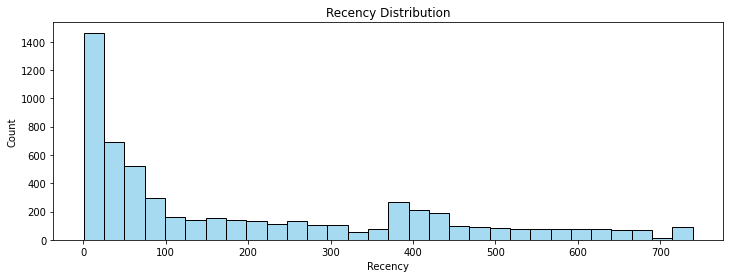

In [44]:
# ----- Recency -----
plt.figure(figsize=(12, 4))

sns.histplot(data=rfm, x='Recency', bins=30, color='skyblue')
plt.title('Recency Distribution')

Text(0.5, 1.0, 'Frequency Distribution')

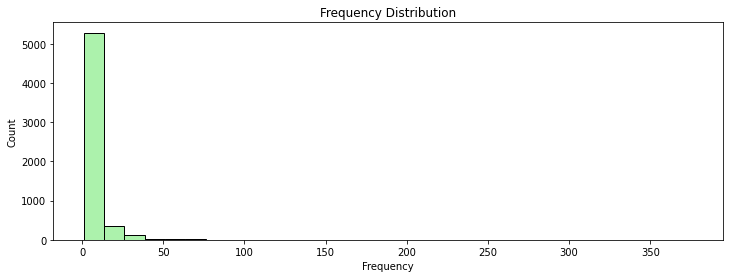

In [45]:
# ----- Frequency -----
plt.figure(figsize=(12, 4))

sns.histplot(data=rfm, x='Frequency', bins=30, color='lightgreen')
plt.title('Frequency Distribution')

Text(0.5, 1.0, 'Monetary Distribution')

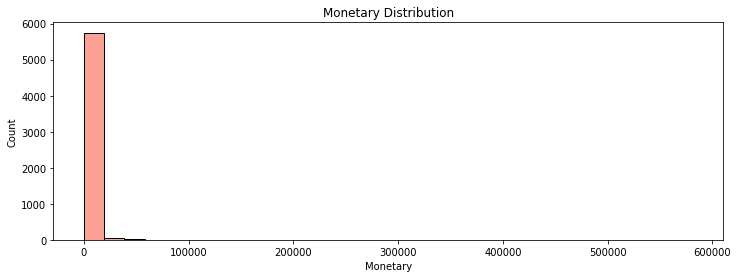

In [46]:
# ----- Monetary -----
plt.figure(figsize=(12, 4))

sns.histplot(data=rfm, x='Monetary', bins=30, color='salmon')
plt.title('Monetary Distribution')

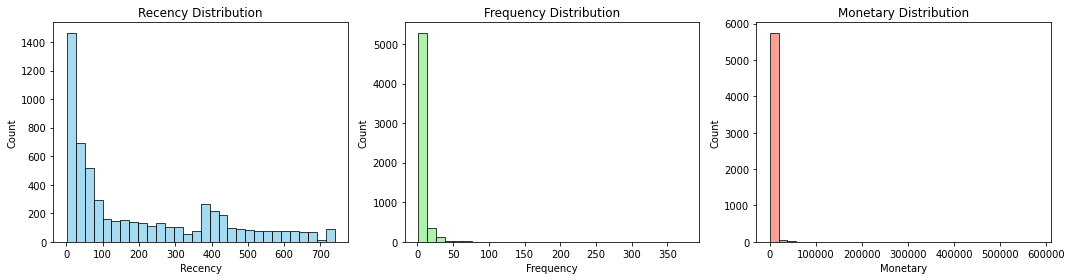

In [47]:
plt.figure(figsize=(15, 4))

#Recency
plt.subplot(1, 3, 1)
sns.histplot(data=rfm, x='Recency', bins=30, color='skyblue')
plt.title('Recency Distribution')

#Frequency
plt.subplot(1, 3, 2)
sns.histplot(data=rfm, x='Frequency', bins=30, color='lightgreen')
plt.title('Frequency Distribution')

#Monetary
plt.subplot(1, 3, 3)
sns.histplot(data=rfm, x='Monetary', bins=30, color='salmon')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

#### After Log Transformation

In [48]:
#Copy RFM columns for visualization
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].copy()

In [49]:
#Apply log transformation to reduce skewness in RFM variables
rfm_log['Recency_log'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency_log'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary_log'] = np.log1p(rfm_log['Monetary'])

Text(0.5, 1.0, 'Recency (log) Distribution')

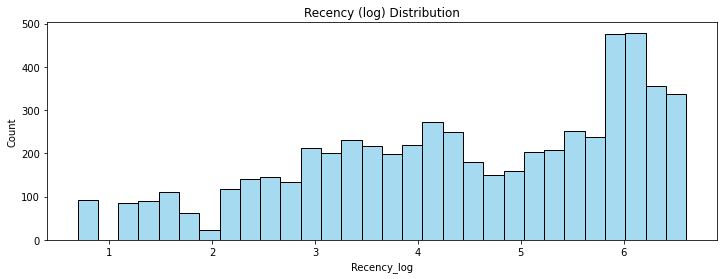

In [50]:
#Create the visualization
# ----- Recency -----
plt.figure(figsize=(12, 4))

sns.histplot(data=rfm_log, x='Recency_log', bins=30, color='skyblue')
plt.title('Recency (log) Distribution')

Text(0.5, 1.0, 'Frequency (log) Distribution')

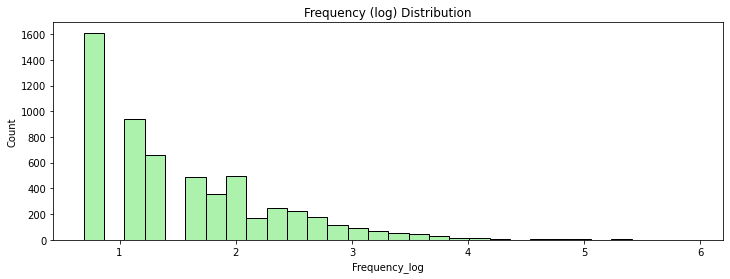

In [51]:
# ----- Frequency -----
plt.figure(figsize=(12, 4))

sns.histplot(data=rfm_log, x='Frequency_log', bins=30, color='lightgreen')
plt.title('Frequency (log) Distribution')

Text(0.5, 1.0, 'Monetary (log) Distribution')

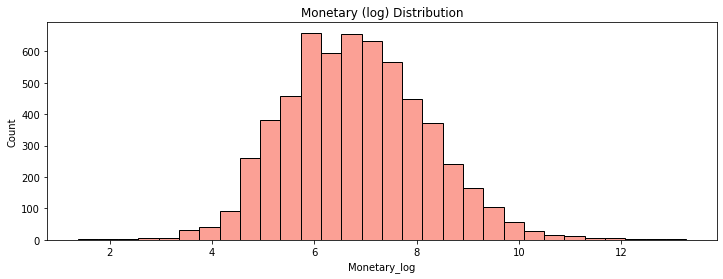

In [52]:
# ----- Monetary -----
plt.figure(figsize=(12, 4))

sns.histplot(data=rfm_log, x='Monetary_log', bins=30, color='salmon')
plt.title('Monetary (log) Distribution')

## Clustering with K-Means

### Data Preprocessing

In [53]:
#Standardize RFM features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

### Finding the Optimal Number of Clusters

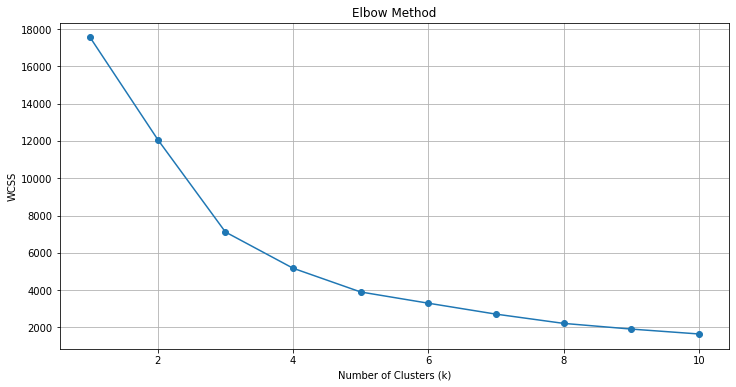

In [54]:
#Use the Elbow Method to determine the optimal number of clusters for K-Means
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### Silhouette Score

In [55]:
#Evaluate clustering quality using silhouette scores for k=2 to 10
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

Silhouette Score for 2 clusters: 0.9160
Silhouette Score for 3 clusters: 0.5814
Silhouette Score for 4 clusters: 0.5901
Silhouette Score for 5 clusters: 0.6028
Silhouette Score for 6 clusters: 0.5472
Silhouette Score for 7 clusters: 0.5475
Silhouette Score for 8 clusters: 0.5400
Silhouette Score for 9 clusters: 0.5409
Silhouette Score for 10 clusters: 0.5004


### Applying K-Means Clustering

In [56]:
#Assign clusters to customers using K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [57]:
#Summary statistics of RFM and customer count by cluster
rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).round(1).rename(columns={'Customer ID': 'The Number of Customers'}).reset_index()

Cluster  Recency  Frequency  Monetary  The Number of Customers
0        0     67.1        7.2    2907.3                     3830
1        1    461.8        2.2     729.0                     1976
2        2     24.3       99.4   77347.9                       38
3        3      3.5      204.2  423450.6                        4

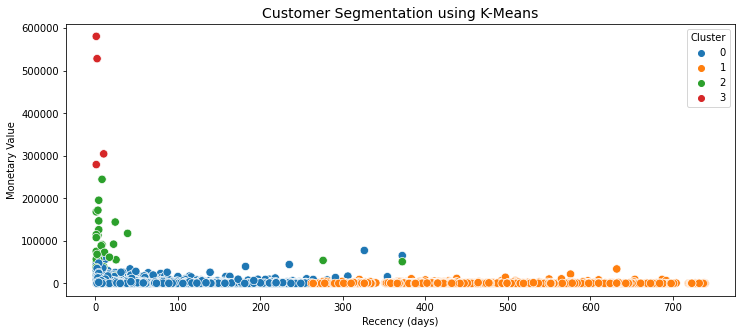

In [58]:
#Scatterplot of clusters based on Recency and Monetary
plt.figure(figsize=(12,5))

sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10', s=70)
plt.title('Customer Segmentation using K-Means', fontsize=14)
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.show()

In [59]:
#Create a mapping of cluster labels to segment names
segment_map={
    0: 'Reguler Customers',
    1: 'Churned Customers',
    2: 'Loyal Customers',
    3: 'New Customers'
}

#Add a new column "Segment" based on cluster mapping
rfm['Segment'] = rfm['Cluster'].map(segment_map)

In [60]:
#See the first 5 rows of the final RFM data
rfm.head()

Customer ID  Recency  Frequency  Monetary  Cluster            Segment
0       12346      326         12  77556.46        0  Reguler Customers
1       12347        2          8   4921.53        0  Reguler Customers
2       12348       75          5   2019.40        0  Reguler Customers
3       12349       19          4   4428.69        0  Reguler Customers
4       12350      310          1    334.40        1  Churned Customers

In [61]:
#Export final RFM dataset to excel
#rfm.to_excel("RFM Data.xlsx", index=False)